In [1]:
# Step 1: Import required libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

# Step 2: Download dataset
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)
print("Files available:", os.listdir(path))

# Step 3: Load dataset
df = pd.read_csv(f"{path}/Mall_Customers.csv")
print(" Dataset Loaded Successfully!")
df.head()


100%|██████████| 1.55k/1.55k [00:00<00:00, 1.83MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1
Files available: ['Mall_Customers.csv']
 Dataset Loaded Successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Check info and missing values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Drop unnecessary columns (like CustomerID)
df = df.drop(columns=['CustomerID'], errors='ignore')

# Convert categorical feature 'Gender' to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Extract only numeric columns for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Data prepared and standardized for clustering.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
 Data prepared and standardized for clustering.


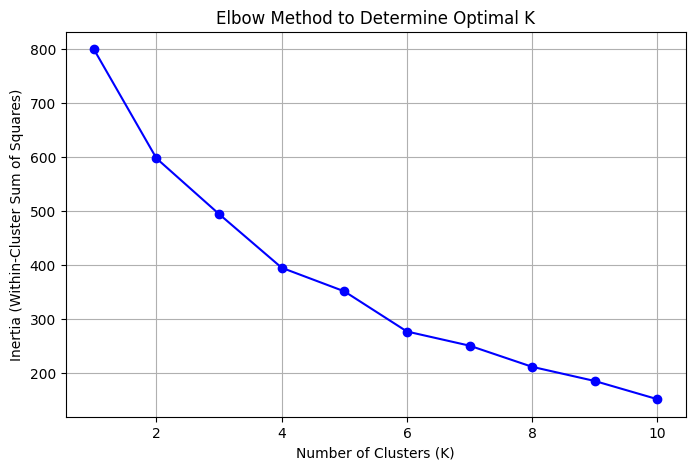

In [3]:
inertia_values = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


In [4]:
# Assuming optimal K = 5 (you can choose based on elbow plot)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = y_kmeans

print(" K-Means clustering complete with K =", k_optimal)
df.head()


 K-Means clustering complete with K = 5


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,4
4,1,31,17,40,4


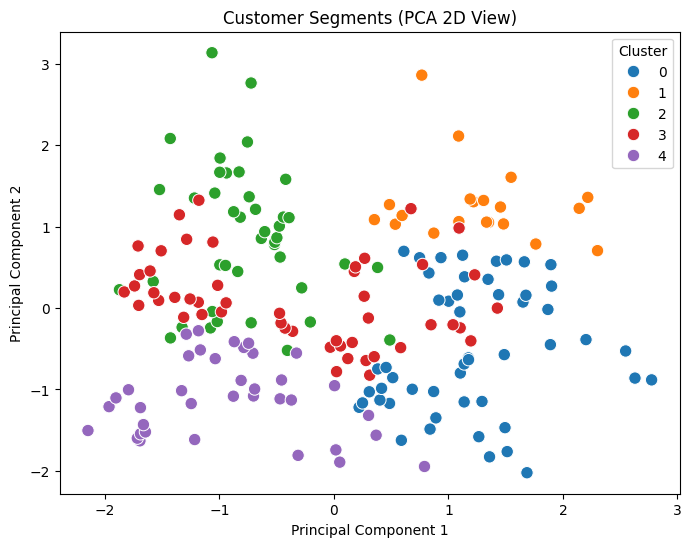

In [5]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = y_kmeans

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=80)
plt.title("Customer Segments (PCA 2D View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [6]:
# Compute Silhouette Score (measure of cluster separation)
sil_score = silhouette_score(X_scaled, y_kmeans)
print(f" Silhouette Score for K={k_optimal}: {sil_score:.3f}")

# Higher silhouette score (close to 1) indicates better-defined clusters.


 Silhouette Score for K=5: 0.272


 Cluster Summary:

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.490196  56.470588           46.098039               39.313725
1        0.000000  39.500000           85.150000               14.050000
2        0.000000  28.690476           60.904762               70.238095
3        1.000000  37.897959           82.122449               54.448980
4        1.000000  27.315789           38.842105               56.210526


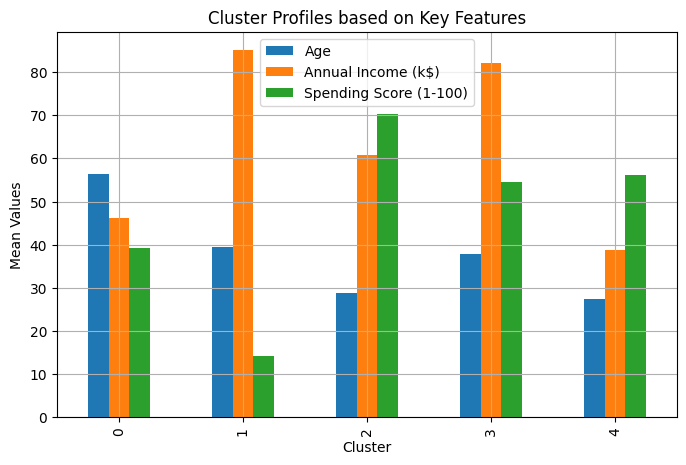

In [7]:
# Get cluster-level statistics
cluster_summary = df.groupby('Cluster').mean()
print(" Cluster Summary:\n")
print(cluster_summary)

# Optional: Visualize cluster means
cluster_summary[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].plot(kind='bar', figsize=(8,5))
plt.title("Cluster Profiles based on Key Features")
plt.ylabel("Mean Values")
plt.grid(True)
plt.show()
